In [57]:
import numpy as np
import gc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import scipy
from scipy import integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import h5py
import cv2

import yt

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

from yt.units import Mpc, km, s
from yt.utilities.physical_constants import mp, G, kb, c

In [42]:
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (1.0, "m/s"),
    "mass": (1.0, "Msun"),
}

ds=yt.load('output3/snapshot_000.hdf5', unit_base=unit_base, unit_system="cgs")
ad = ds.all_data()

density=ad[('gas','density')]
np.max(density), np.min(density)

yt : [INFO     ] 2022-05-02 19:19:49,428 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2022-05-02 19:19:49,842 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-02 19:19:49,850 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-05-02 19:19:49,857 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-02 19:19:49,864 Parameters: domain_right_edge         = [0.0101112 0.0101112 0.0101112]
yt : [INFO     ] 2022-05-02 19:19:49,869 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-05-02 19:19:49,935 Allocating for 1.134e+04 particles


(unyt_quantity(1.02910405e-15, 'g/cm**3'),
 unyt_quantity(5.49497922e-18, 'g/cm**3'))

yt : [INFO     ] 2022-05-02 19:20:07,849 xlim = 0.000207 0.009904
yt : [INFO     ] 2022-05-02 19:20:07,852 ylim = 0.000207 0.009904
yt : [INFO     ] 2022-05-02 19:20:07,858 xlim = 0.000207 0.009904
yt : [INFO     ] 2022-05-02 19:20:07,861 ylim = 0.000207 0.009904
yt : [INFO     ] 2022-05-02 19:20:07,903 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-02 19:20:11,859 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



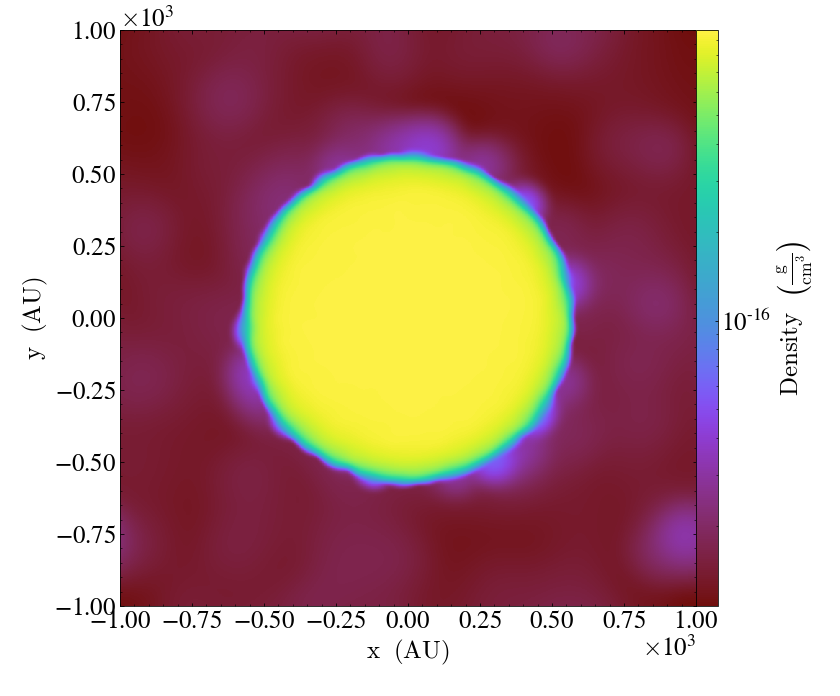

In [43]:
fig_width=2e3

p = yt.ProjectionPlot(ds, 'z', ('gas','density'), weight_field=('gas','density'), data_source=ad, width = (fig_width,'au'), fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','density'))

#p.annotate_timestamp()
p.show()

yt : [INFO     ] 2022-05-02 19:20:20,444 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:20:20,449 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:20:20,455 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:20:20,458 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:20:20,493 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



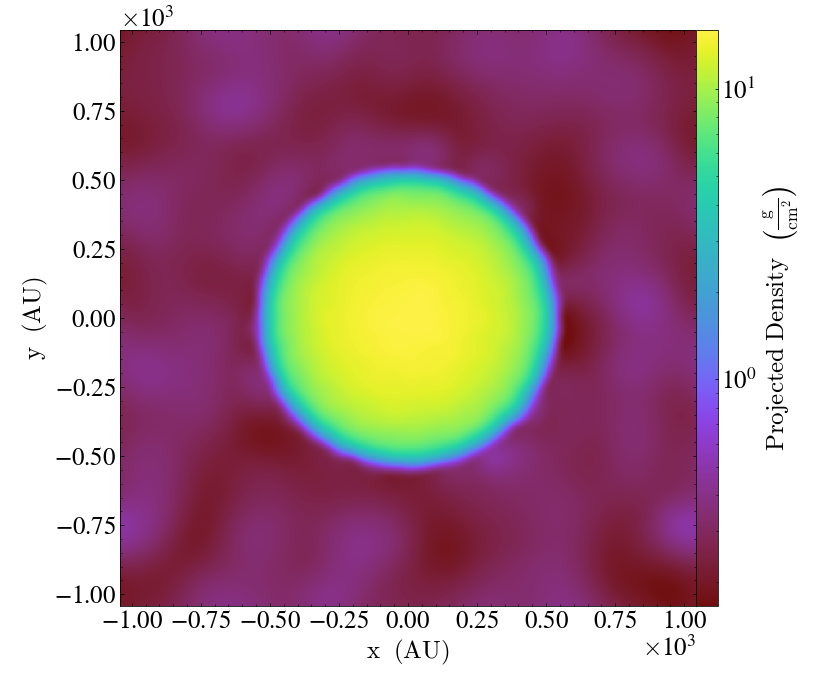

In [44]:
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), data_source=ad, fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','density'))
p.show()

yt : [INFO     ] 2022-05-02 19:20:29,931 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:20:29,934 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:20:29,940 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:20:29,943 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:20:29,978 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



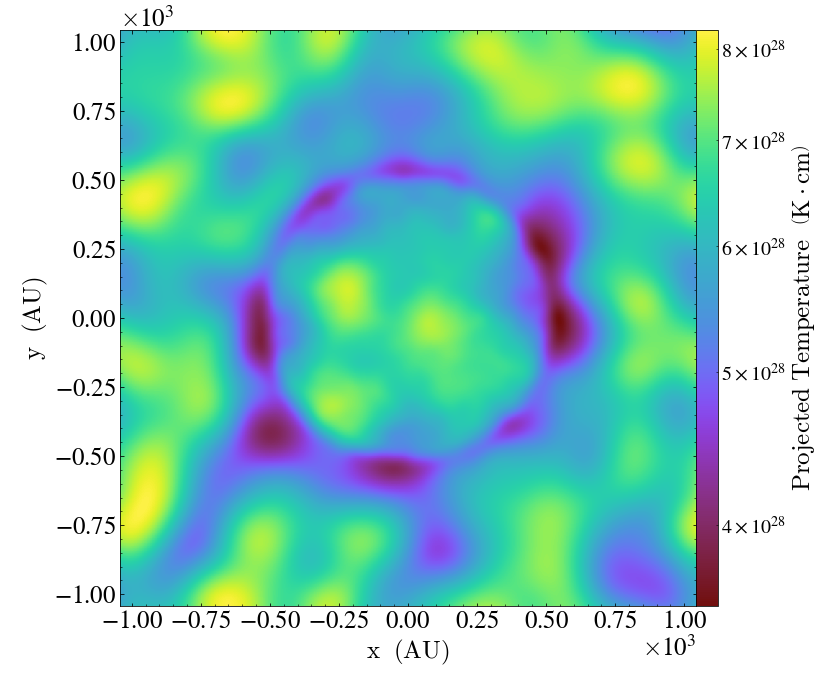

In [45]:
p = yt.ProjectionPlot(ds, 'z', ('gas','temperature'), data_source=ad, fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','temperature'))
p.show()

In [46]:
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (1.0, "m/s"),
    "mass": (1.0, "Msun"),
}

ds=yt.load('output3/snapshot_301.hdf5', unit_base=unit_base, unit_system="cgs")
ad = ds.all_data()

density=ad[('gas','density')]
np.max(density), np.min(density)

yt : [INFO     ] 2022-05-02 19:20:39,264 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2022-05-02 19:20:39,696 Parameters: current_time              = 4.304833582460616e-06
yt : [INFO     ] 2022-05-02 19:20:39,703 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-05-02 19:20:39,710 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-02 19:20:39,718 Parameters: domain_right_edge         = [0.0101112 0.0101112 0.0101112]
yt : [INFO     ] 2022-05-02 19:20:39,722 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-05-02 19:20:39,791 Allocating for 1.134e+04 particles


(unyt_quantity(1.51854484e-14, 'g/cm**3'),
 unyt_quantity(2.79922491e-18, 'g/cm**3'))

yt : [INFO     ] 2022-05-02 19:20:56,745 xlim = 0.000207 0.009904
yt : [INFO     ] 2022-05-02 19:20:56,748 ylim = 0.000207 0.009904
yt : [INFO     ] 2022-05-02 19:20:56,755 xlim = 0.000207 0.009904
yt : [INFO     ] 2022-05-02 19:20:56,759 ylim = 0.000207 0.009904
yt : [INFO     ] 2022-05-02 19:20:56,799 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2022-05-02 19:21:00,635 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



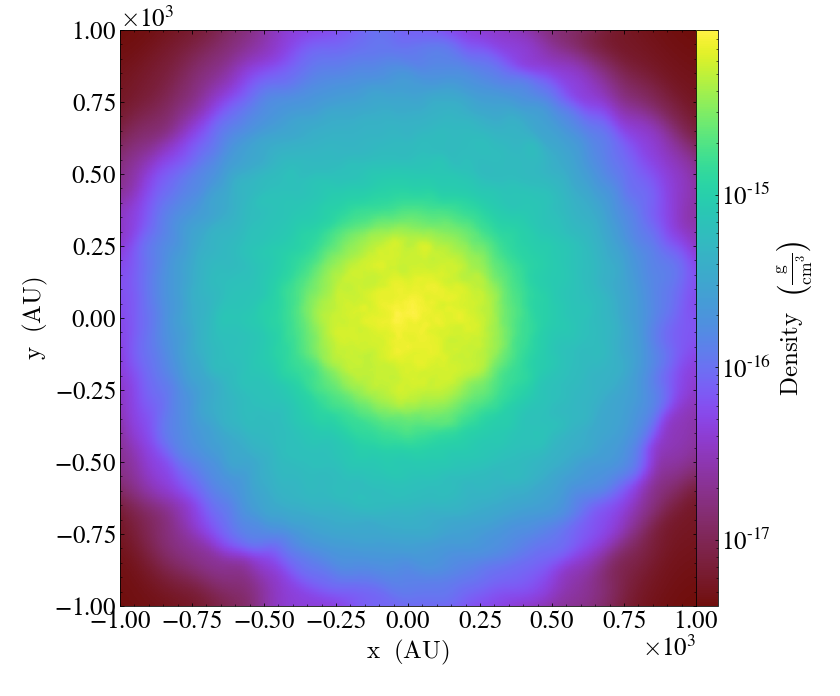

In [47]:
fig_width=2e3

p = yt.ProjectionPlot(ds, 'z', ('gas','density'), weight_field=('gas','density'), data_source=ad, width = (fig_width,'au'), fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','density'))

p.annotate_timestamp()
p.show()

yt : [INFO     ] 2022-05-02 19:21:09,922 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:21:09,925 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:21:09,932 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:21:09,935 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:21:09,971 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



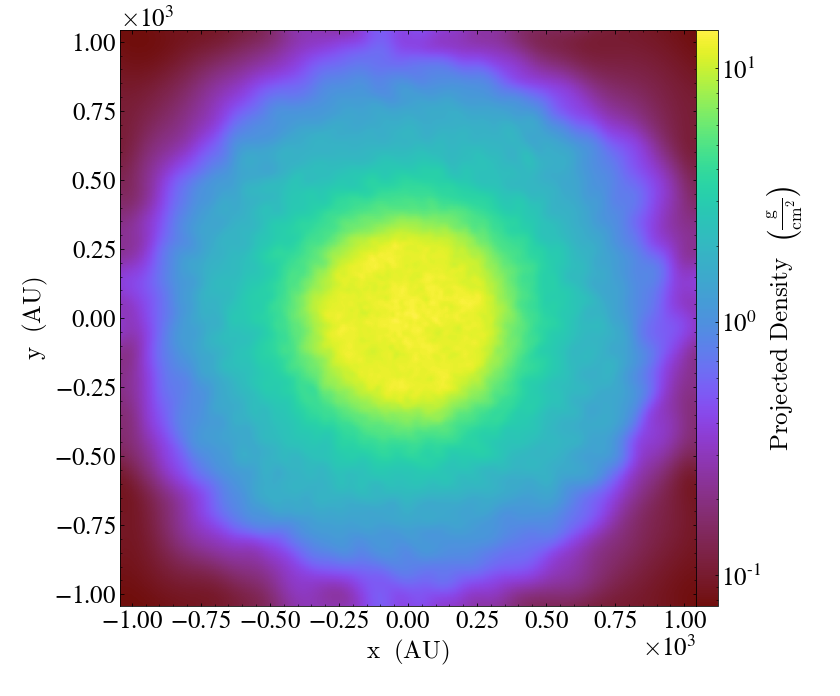

In [48]:
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), data_source=ad, fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','density'))
p.show()

yt : [INFO     ] 2022-05-02 19:21:19,005 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:21:19,008 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:21:19,015 xlim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:21:19,018 ylim = 0.000000 0.010111
yt : [INFO     ] 2022-05-02 19:21:19,058 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



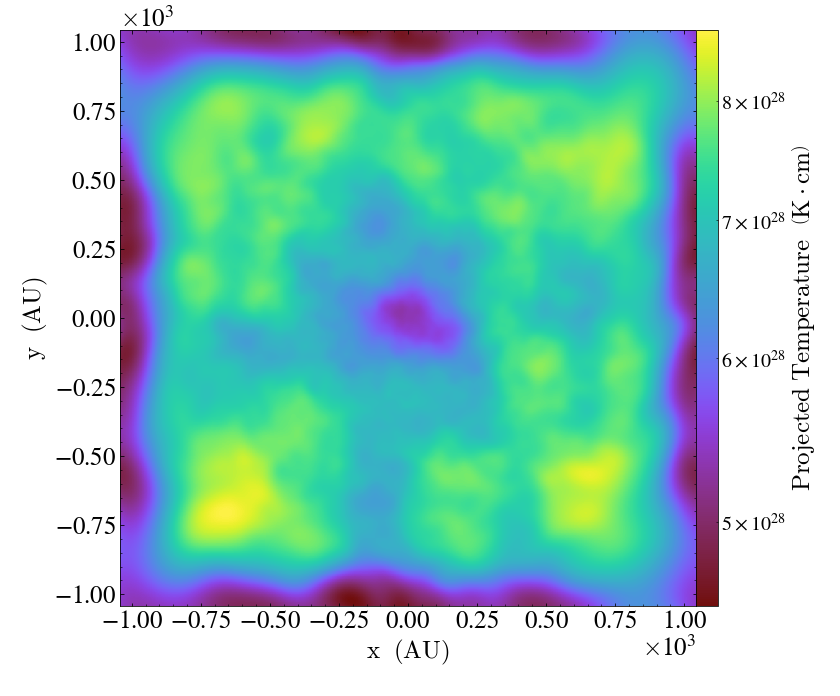

In [49]:
p = yt.ProjectionPlot(ds, 'z', ('gas','temperature'), data_source=ad, fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','temperature'))
p.show()

In [90]:
def _MagneticFieldStrength(field, data):
    return (
        (ad[('all','MagneticField')][:,0]**2+ad[('all','MagneticField')][:,1]**2+ad[('all','MagneticField')][:,2]**2)**0.5
    )

ds.add_field(
    name=("all", "MagneticFieldStrength"),
    function=_MagneticFieldStrength,
    sampling_type="local",
)

yt : [WARNING  ] 2022-04-16 02:04:08,386 Field ('all', 'MagneticFieldStrength') already exists. To override use `force_override=True`.


ReferenceError: weakly-referenced object no longer exists

yt : [INFO     ] 2022-04-16 01:38:29,938 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,941 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,947 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,950 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,960 Splatting (('all', 'MagneticFieldStrength')) onto a 800 by 800 mesh using method 'ngp'



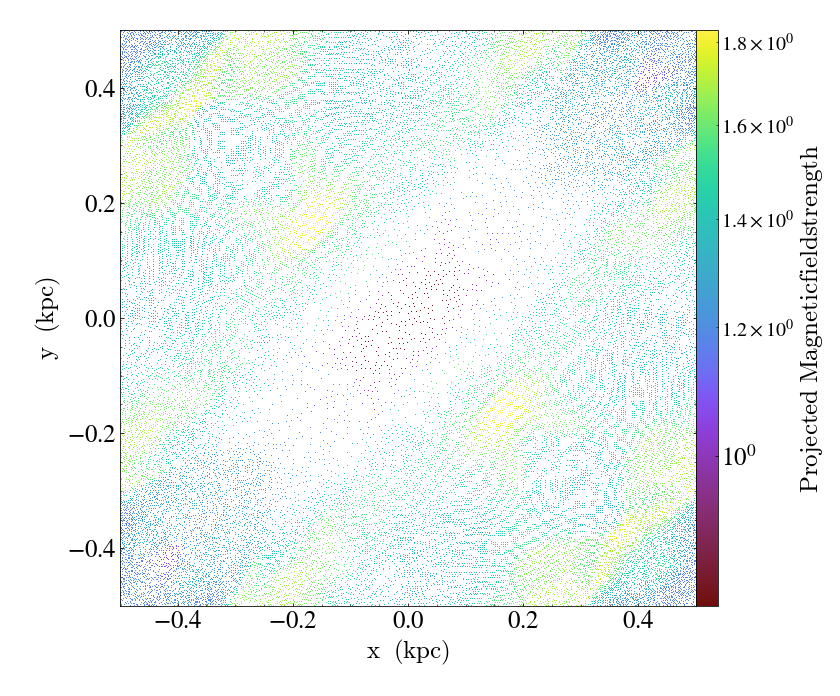

<Figure size 432x288 with 0 Axes>

In [68]:
kwargs={'markersize': 5}
p = yt.ParticlePlot(ds, ("all", "particle_position_x"), ("all", "particle_position_y"), ('all','MagneticFieldStrength'), fontsize=25)

p.show()
plt.tight_layout()

In [5]:
ds.derived_field_list

[('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'ParticleChildIDsNumber'),
 ('PartType0', 'ParticleIDGenerationNumber'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'SmoothingLength'),
 ('PartType0', 'Temperature'),
 ('PartType0', 'Velocities'),
 ('PartType0', 'angular_momentum'),
 ('PartType0', 'angular_momentum_magnitude'),
 ('PartType0', 'angular_momentum_x'),
 ('PartType0', 'angular_momentum_y'),
 ('PartType0', 'angular_momentum_z'),
 ('PartType0', 'cylindrical_radius'),
 ('PartType0', 'cylindrical_theta'),
 ('PartType0', 'cylindrical_velocity_theta'),
 ('PartType0', 'cylindrical_velocity_z'),
 ('PartType0', 'cylindrical_z'),
 ('PartType0', 'density'),
 ('PartType0', 'index'),
 ('PartType0', 'mass'),
 ('PartType0', 'ones'),
 ('PartType0', 'particle_angular_momentum'),
 ('PartType0', 'particle_angular_momentum_magnitude'),
 ('PartType0', 'particle_angular_momentum_x'),
 ('PartType0', 'particle_ang

In [58]:
pathOut = "fig/movie3.avi"

fps = 20
frame_array = []

# 100 Myr in previous 5 pc run = 110 Myr in this run (HH0110)
for i in range(0,302):
    i1=i
    filename1=("fig/output3_{:03d}.png".format(i1))

    image1 = cv2.imread(filename1) # image read
    height, width, layers = image1.shape
    size = (width,height)
        
    #inserting the frames into an image array
    frame_array.append(image1)
    
    
#out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'MJPG'), fps, size)

for i in range(len(frame_array)): # writing to a image array
    out.write(frame_array[i])
out.release()